### Uber Data Analysis Project
This notebook covers the steps involved in data preprocessing, feature engineering, model training, and visualization based on Uber trip data.

### Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
uber_data = pd.read_csv('Uber_Data.csv')
uber_data.head()


,City,Product_Type,Trip_or_Order_Status,Request_Time,Begin_Trip_Time,Begin_Trip_Lat,Begin_Trip_Lng,Dropoff_Time,Dropoff_Lat,Dropoff_Lng,Distance_(miles),Fare_Amount,Fare_Currency
0,458,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,-23.599752,-46.715954,2021-01-13 22:29:13 +0000 UTC,-23.559359,-46.666542,4.84,29.63,BRL
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,BRL
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,BRL
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,BRL
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,BRL


### Data Preprocessing


In [3]:
# Remove missing values
uber_data = uber_data.dropna()

# Remove outliers using Interquartile Range (IQR) for 'Distance_(miles)' and 'Fare_Amount'
Q1_distance = uber_data['Distance_(miles)'].quantile(0.25)
Q3_distance = uber_data['Distance_(miles)'].quantile(0.75)
IQR_distance = Q3_distance - Q1_distance

Q1_fare = uber_data['Fare_Amount'].quantile(0.25)
Q3_fare = uber_data['Fare_Amount'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Filter out rows where the values in 'Distance_(miles)' and 'Fare_Amount' are outliers
filtered_data = uber_data[
    (uber_data['Distance_(miles)'] >= Q1_distance - 1.5 * IQR_distance) &
    (uber_data['Distance_(miles)'] <= Q3_distance + 1.5 * IQR_distance) &
    (uber_data['Fare_Amount'] >= Q1_fare - 1.5 * IQR_fare) &
    (uber_data['Fare_Amount'] <= Q3_fare + 1.5 * IQR_fare)
]
filtered_data.head()


,City,Product_Type,Trip_or_Order_Status,Request_Time,Begin_Trip_Time,Begin_Trip_Lat,Begin_Trip_Lng,Dropoff_Time,Dropoff_Lat,Dropoff_Lng,Distance_(miles),Fare_Amount,Fare_Currency
0,458,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,-23.599752,-46.715954,2021-01-13 22:29:13 +0000 UTC,-23.559359,-46.666542,4.84,29.63,BRL
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,BRL
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,BRL
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,BRL
5,458,VIP,COMPLETED,2020-12-10 11:42:15 +0000 UTC,2020-12-10 11:46:20 +0000 UTC,-23.559372,-46.666473,2020-12-10 12:06:15 +0000 UTC,-23.624500,-46.701077,6.17,21.25,BRL


### Feature Engineering

In [7]:
# Create a copy of the filtered data to avoid SettingWithCopyWarning
filtered_data = uber_data.copy()

# Ensure the 'Request_Time' column is treated as string before performing string operations
filtered_data['Request_Time'] = filtered_data['Request_Time'].astype(str)

# Clean the 'Request_Time' column and create new features
filtered_data['Request_Time'] = filtered_data['Request_Time'].str.replace(' +0000 UTC', '', regex=False)
filtered_data['Request_Time'] = pd.to_datetime(filtered_data['Request_Time'])

# Create day of the week, hour of the day, and month features
filtered_data['Day_of_Week'] = filtered_data['Request_Time'].dt.dayofweek
filtered_data['Hour_of_Day'] = filtered_data['Request_Time'].dt.hour
filtered_data['Month'] = filtered_data['Request_Time'].dt.month

# Display the updated dataset
filtered_data.head()


,City,Product_Type,Trip_or_Order_Status,Request_Time,Begin_Trip_Time,Begin_Trip_Lat,Begin_Trip_Lng,Dropoff_Time,Dropoff_Lat,Dropoff_Lng,Distance_(miles),Fare_Amount,Fare_Currency,Day_of_Week,Hour_of_Day,Month
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10 +0000 UTC,-23.599752,-46.715954,2021-01-13 22:29:13 +0000 UTC,-23.559359,-46.666542,4.84,29.63,BRL,2,22,1
1,458,VIP,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,BRL,2,20,1
2,458,VIP,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,BRL,6,0,1
3,458,VIP,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,BRL,4,23,12
4,458,VIP,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,BRL,4,0,12


### Model Training & Evaluation

In [8]:

# Prepare features and target variable for regression
features = filtered_data[['Distance_(miles)', 'Day_of_Week', 'Hour_of_Day', 'Month']]
target = filtered_data['Fare_Amount']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data and evaluate performance using Mean Squared Error (MSE)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 45.41687688493315


### Visualizations
We will visualize different insights, such as fare amounts by day of the week and the relationship between distance and fare.

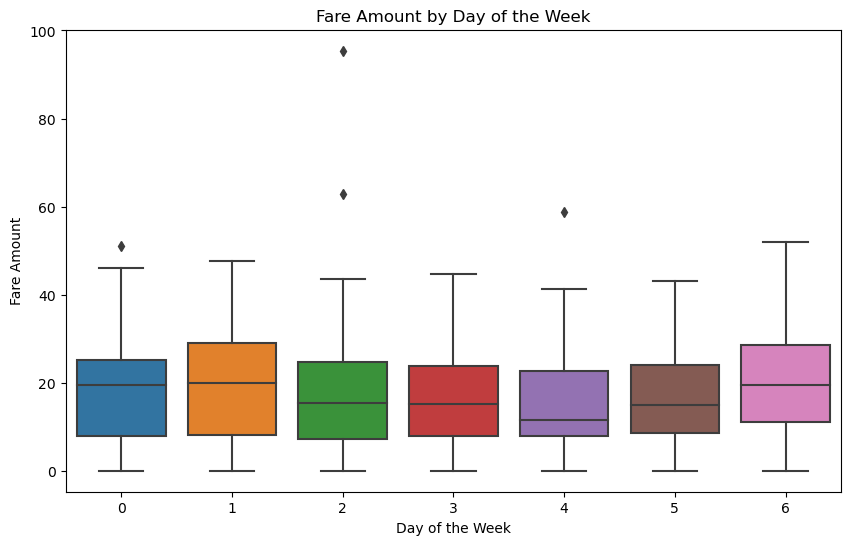

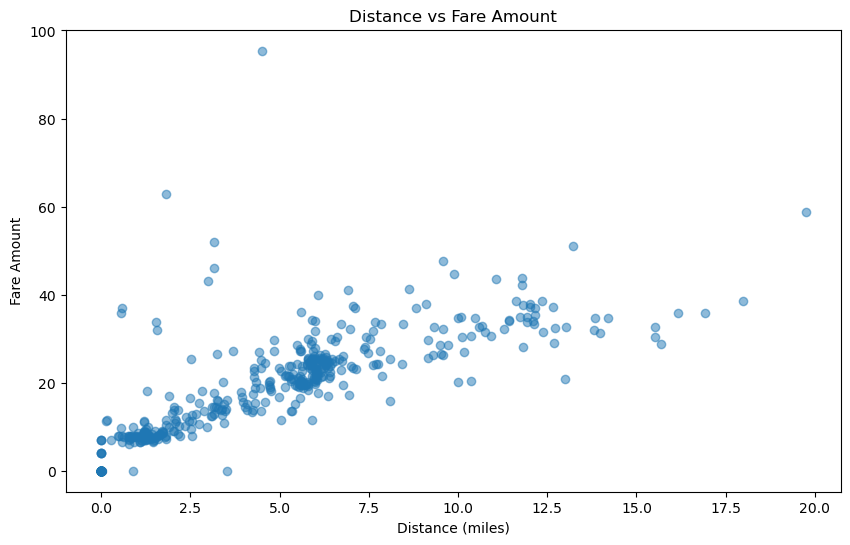

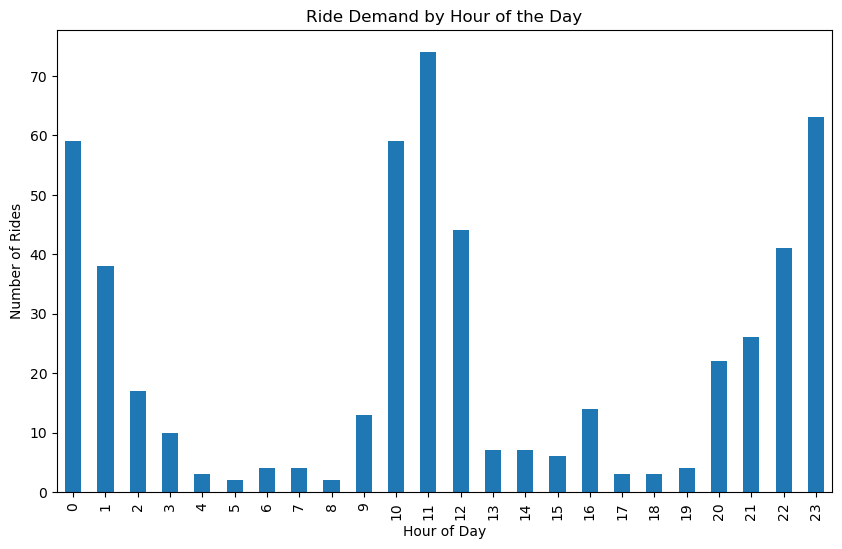

In [9]:

# Visualization 1: Distribution of fare amounts by day of the week
plt.figure(figsize=(10,6))
sns.boxplot(x='Day_of_Week', y='Fare_Amount', data=filtered_data)
plt.title("Fare Amount by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Fare Amount")
plt.show()

# Visualization 2: Scatter plot for Distance vs Fare Amount
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Distance_(miles)'], filtered_data['Fare_Amount'], alpha=0.5)
plt.title("Distance vs Fare Amount")
plt.xlabel("Distance (miles)")
plt.ylabel("Fare Amount")
plt.show()

# Visualization 3: Ride demand by hour of the day
ride_count_per_hour = filtered_data.groupby('Hour_of_Day').size()
plt.figure(figsize=(10,6))
ride_count_per_hour.plot(kind='bar')
plt.title("Ride Demand by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.show()


### Peak Demand Prediction
We will predict the peak demand using historical trip data by analyzing the number of trips requested over time.

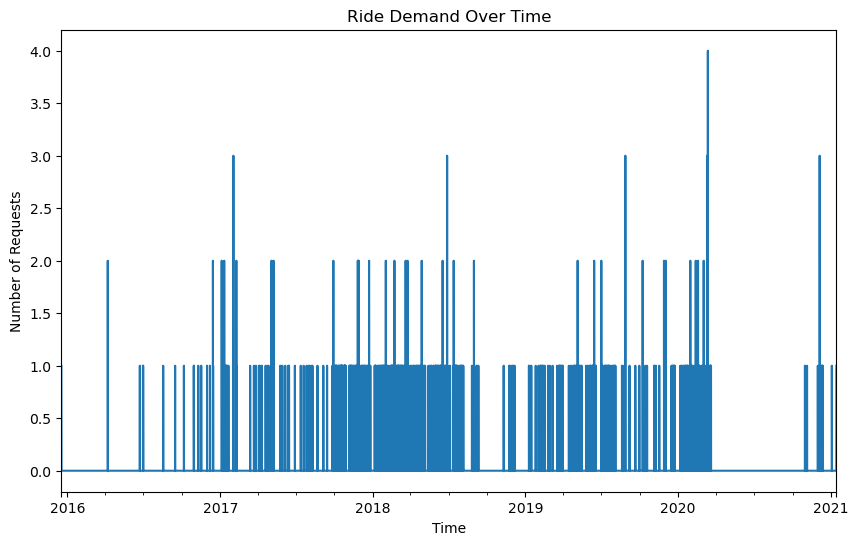

In [10]:

# Resample the data to get hourly ride requests
demand_per_hour = filtered_data.set_index('Request_Time').resample('H').size()

# Plot the demand over time
plt.figure(figsize=(10, 6))
demand_per_hour.plot()
plt.title("Ride Demand Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Requests")
plt.show()


### Revenue Forecasting
We will forecast future revenue based on historical fare data.

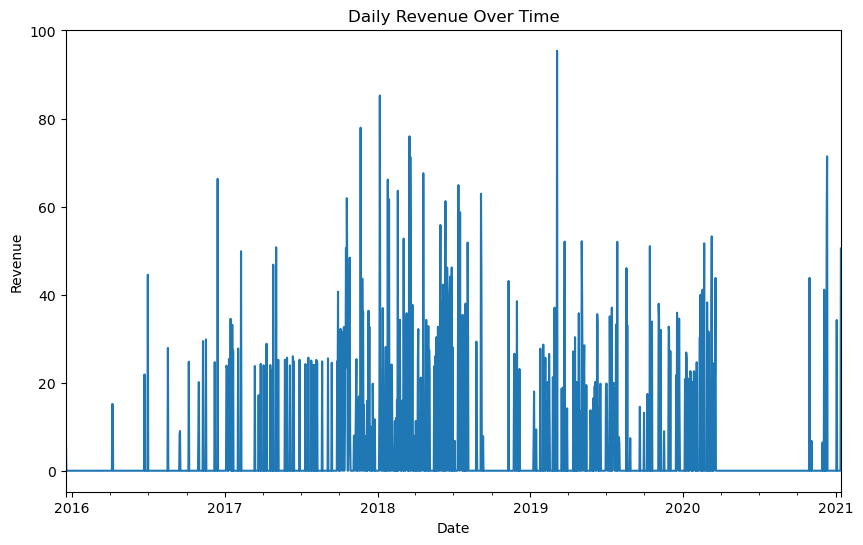

In [11]:

# Calculate total revenue per day
daily_revenue = filtered_data.set_index('Request_Time').resample('D')['Fare_Amount'].sum()

# Plot the daily revenue
plt.figure(figsize=(10, 6))
daily_revenue.plot()
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


### Trip Distance Prediction
We will predict the trip distance based on factors such as pickup time, day of the week, and product type.

In [12]:

# Predict trip distance using a regression model
features_distance = filtered_data[['Day_of_Week', 'Hour_of_Day', 'Month', 'Fare_Amount']]
target_distance = filtered_data['Distance_(miles)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_distance, target_distance, test_size=0.2, random_state=42)

# Train a Linear Regression model for distance prediction
model_distance = LinearRegression()
model_distance.fit(X_train, y_train)

# Predict on test data and evaluate
y_pred_distance = model_distance.predict(X_test)
mse_distance = mean_squared_error(y_test, y_pred_distance)
print(f'Mean Squared Error for Trip Distance Prediction: {mse_distance}')


Mean Squared Error for Trip Distance Prediction: 4.640454006970379


### Peak Hour Analysis
We will identify the hours of the day that see the highest ride demand.

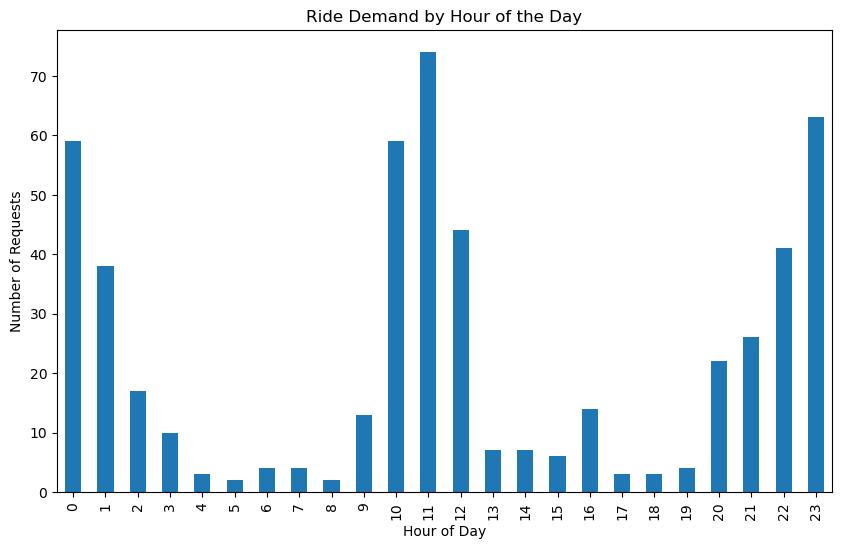

In [13]:

# Analyze peak hours based on the number of requests
plt.figure(figsize=(10, 6))
peak_hours = filtered_data.groupby('Hour_of_Day').size()
peak_hours.plot(kind='bar')
plt.title("Ride Demand by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.show()


### Customer Behavior Analysis
We will analyze customer behavior in terms of ride frequency and distance preferences.

<Figure size 1000x600 with 0 Axes>

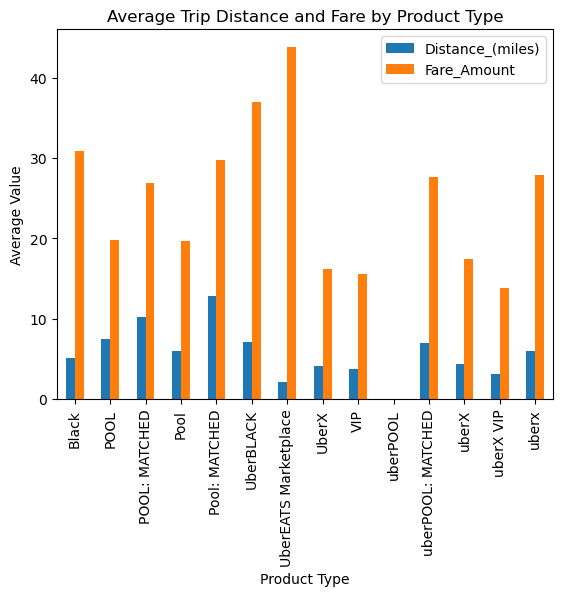

In [14]:

# Analyze average trip distance and fare by product type
customer_behavior = filtered_data.groupby('Product_Type')[['Distance_(miles)', 'Fare_Amount']].mean()

# Plot customer behavior insights
plt.figure(figsize=(10,6))
customer_behavior.plot(kind='bar')
plt.title("Average Trip Distance and Fare by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Average Value")
plt.show()


## Prediction of a Trip

Trip distance: 5 miles

Hour of the day: 14 (2 PM)

Day of the week: 3 (Wednesday)


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

features_fare = filtered_data[['Distance_(miles)', 'Hour_of_Day', 'Day_of_Week']]
target_fare = filtered_data['Fare_Amount']


X_train, X_test, y_train, y_test = train_test_split(features_fare, target_fare, test_size=0.2, random_state=42)

model_fare = LinearRegression()
model_fare.fit(X_train, y_train)


y_pred_test = model_fare.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print the MSE and R-squared values
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

# Predict the fare for a new trip
# New trip details (distance, hour of day, and day of the week)
new_trip = pd.DataFrame([[5.0, 14, 3]], columns=['Distance_(miles)', 'Hour_of_Day', 'Day_of_Week'])

# Use the trained model to predict the fare for this new trip
predicted_fare = model_fare.predict(new_trip)

# Print the predicted fare
print(f'Predicted Fare for a 5-mile trip at 2 PM on a Wednesday: ${predicted_fare[0]:.2f}')


Mean Squared Error: 45.32
R-squared (R²) Score: 0.62
Predicted Fare for a 5-mile trip at 2 PM on a Wednesday: $19.49
